# Download and read data

In [ ]:
Class2SDG = {
    1: 'NO POVERTY',
    2: 'ZERO HUNGER',
    3: 'GOOD HEALTH AND WELL-BEING',
    4: 'QUALITY EDUCATION',
    5: 'GENDER EQUALITY',
    6: 'CLEAN WATER AND SANITATION',
    7: 'AFFORDABLE AND CLEAN ENERGY',
    8: 'DECENT WORK AND ECONOMIC GROWTH',
    9: 'INDUSTRY, INNOVATION, AND INFRASTRUCTURE',
    10: 'REDUCED INEQUALITIES',
    11: 'SUSTAINABLE CITIES AND COMMUNITIES',
    12: 'RESPONSIBLE CONSUMPTION AND PRODUCTION',
    13: 'CLIMATE ACTION',
    14: 'LIFE BELOW WATER',
    15: 'LIFE ON LAND',
    16: 'PEACE, JUSTICE AND STRONG INSTITUTIONS',
    17: 'PARTNERSHIPS',
}

In [ ]:
import gdown

# Download training file
#train_file = 'https://drive.google.com/file/d/1RMDE3TAvbSen1XX4hV8dY0uisQsmHdRs/view?usp=sharing'
!gdown 1RMDE3TAvbSen1XX4hV8dY0uisQsmHdRs

# Download testing file
#test_file = 'https://drive.google.com/file/d/1fPSpj-mhiS4LFofOI-goLRdCzuA-HhmT/view?usp=sharing'
!gdown 1fPSpj-mhiS4LFofOI-goLRdCzuA-HhmT

Downloading...
From: https://drive.google.com/uc?id=1RMDE3TAvbSen1XX4hV8dY0uisQsmHdRs
To: /content/Train_data.csv
100% 482k/482k [00:00<00:00, 129MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fPSpj-mhiS4LFofOI-goLRdCzuA-HhmT
To: /content/Test_data.csv
100% 180k/180k [00:00<00:00, 63.2MB/s]


In [ ]:
import pandas as pd

train_file_path = '/content/Train_data.csv'
test_file_path  = '/content/Test_data.csv'

train_df = pd.read_csv(train_file_path)[['text','SDG']]
test_df = pd.read_csv(test_file_path)[['text','SDG']]

In [ ]:
train_df

,text,SDG
0,"Furthermore, the need to “Protect, restore and...",15
1,Implementing sustainable development goal 11 i...,11
2,which aims to “develop and implement tools to ...,8
3,It was acknowledged that fundamental changes i...,12
4,"Furthermore, it provided guidelines for natura...",11
...,...,...
1659,"Amongst numerous commitments, the Conference c...",8
1660,Proportion of fish stocks within biologically ...,14
1661,"In paragraph 23, Member States renewed the com...",12
1662,Chapter 21 was considered by the Commission on...,12


### data cleaning

In [ ]:
import re
import string
import spacy

def df_cleaning(df):
  # no capital letters
  df['cleaned']=df['text'].apply(lambda x: x.lower())

  
  # remove punctuations
  df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


  # Loading model
  nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

  # Lemmatization with stopwords removal
  df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
  return df

In [ ]:
train_df = df_cleaning(train_df)
test_df = df_cleaning(test_df)

train_df

,text,SDG,cleaned,lemmatized
0,"Furthermore, the need to “Protect, restore and...",15,furthermore the need to “protect restore and p...,"furthermore need "" protect restore promote sus..."
1,Implementing sustainable development goal 11 i...,11,implementing sustainable development goal 11 i...,implement sustainable development goal 11 afri...
2,which aims to “develop and implement tools to ...,8,which aims to “develop and implement tools to ...,"aim "" develop implement tool monitor sustainab..."
3,It was acknowledged that fundamental changes i...,12,it was acknowledged that fundamental changes i...,acknowledge fundamental change way society pro...
4,"Furthermore, it provided guidelines for natura...",11,furthermore it provided guidelines for natural...,furthermore provide guideline natural disaster...
...,...,...,...,...
1659,"Amongst numerous commitments, the Conference c...",8,amongst numerous commitments the conference ca...,numerous commitment conference call government...
1660,Proportion of fish stocks within biologically ...,14,proportion of fish stocks within biologically ...,proportion fish stock biologically sustainable...
1661,"In paragraph 23, Member States renewed the com...",12,in paragraph 23 member states renewed the comm...,paragraph 23 member state renew commitment adv...
1662,Chapter 21 was considered by the Commission on...,12,chapter 21 was considered by the commission on...,chapter 21 consider commission sustainable dev...


### Average number of tokens per class

In [ ]:
import numpy as np

#train_df['text length'] = train_df['text'].apply(lambda x: len(x.split()))
#train_df_grouped_len= train_df[['SDG','text length']].groupby(by='SDG').agg([np.average, np.std, np.max,np.min]).round(1)

train_df['text length'] = train_df['text'].apply(lambda x: len(x.split()))
train_df['lemma length'] = train_df['lemmatized'].apply(lambda x: len(x.split()))

train_df_grouped_len= train_df[['SDG','text length','lemma length']].groupby(by='SDG').agg([np.average, np.std, np.max,np.min]).round(1)

train_df_grouped_len

text length                 lemma length                
        average   std amax amin      average   std amax amin
SDG                                                         
1          39.9  39.2  195    9         22.5  21.6  107    5
2          37.7  42.1  267    4         22.8  25.3  167    2
3          33.2  26.5  178    6         19.5  15.4  108    4
4          46.9  55.1  279    3         28.0  36.5  229    2
5          42.1  44.1  268    6         23.6  23.8  142    4
6          33.5  34.8  191    8         20.0  19.7  109    5
7          51.4  56.2  251    7         32.0  36.7  154    4
8          37.0  43.2  294    7         21.9  24.5  180    3
9          34.1  36.1  202    6         20.4  19.6  113    4
10         55.1  62.0  281    8         33.1  36.7  176    5
11         45.6  54.5  308    7         27.2  32.2  195    5
12         36.8  35.0  262    5         21.9  20.9  158    3
13         47.7  42.9  212   10         28.5  24.9  126    6
14         39.6  42.3  269    8         23.4  24.0  152    5
15         37.6  29.9  276    9         22.2  18.4  182    4
16         33.7  34.7  242    7         19.8  20.7  139    5
17         35.4  27.7  207    6         21.5  17.0  128    3

## Exploratory data analysis

#### Class distributions


In [ ]:
len(train_df[['text']])

1664

In [ ]:
len(test_df[['text']])

555

In [ ]:
train_df[['SDG']].value_counts()

SDG
17     199
15     140
8      118
16     114
3      111
11     108
2      106
12      95
4       94
1       91
13      90
5       82
6       77
10      65
9       62
14      59
7       53
dtype: int64

In [ ]:
test_df[['SDG']].value_counts()

SDG
17     67
15     47
8      39
16     38
3      37
11     36
2      36
4      32
12     32
13     30
1      30
5      27
6      25
10     21
9      21
14     20
7      17
dtype: int64

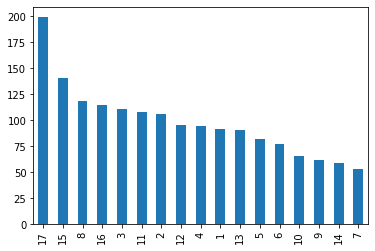

In [ ]:
pd.value_counts(train_df['SDG']).plot.bar()

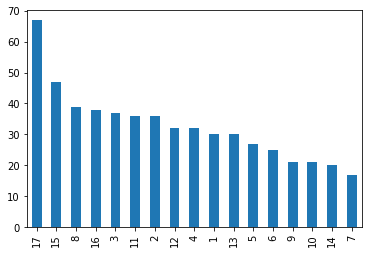

In [ ]:
pd.value_counts(test_df['SDG']).plot.bar()

In [ ]:
train_dfX = train_df[['text']]
train_dfy = train_df[['SDG']]

In [ ]:
train_dfX

,text,SDG
0,"Furthermore, the need to “Protect, restore and...",15
1,Implementing sustainable development goal 11 i...,11
2,which aims to “develop and implement tools to ...,8
3,It was acknowledged that fundamental changes i...,12
4,"Furthermore, it provided guidelines for natura...",11
...,...,...
1659,"Amongst numerous commitments, the Conference c...",8
1660,Proportion of fish stocks within biologically ...,14
1661,"In paragraph 23, Member States renewed the com...",12
1662,Chapter 21 was considered by the Commission on...,12


### Word cloud

In [ ]:
# Importing wordcloud for plotting word clouds
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from textwrap import wrap

import matplotlib.pyplot as plt

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(5,4))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title(Class2SDG[title] )
  plt.show()

def generate_wordcloud_from_grouped_df(df_grouped):
  # Creating Document Term Matrix
  cv=CountVectorizer(analyzer='word')
  data=cv.fit_transform(df_grouped['lemmatized'])
  df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
  df_dtm.index=df_grouped.index

  # Transposing document term matrix
  df_dtm=df_dtm.transpose()

  # Plotting word cloud for each product
  for index,product in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

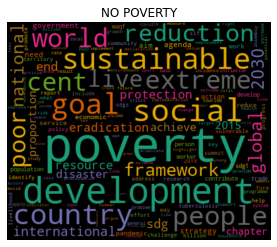

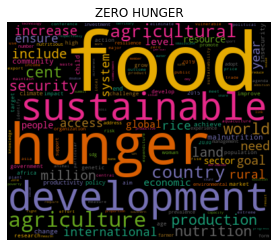

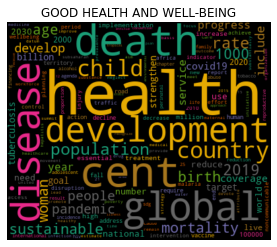

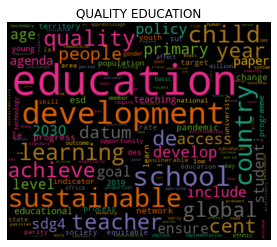

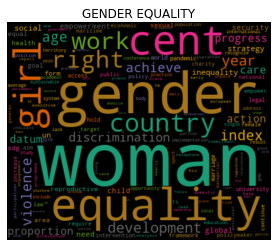

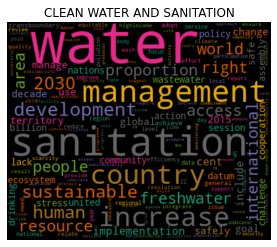

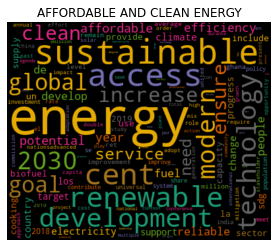

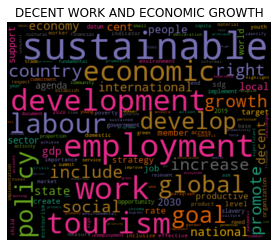

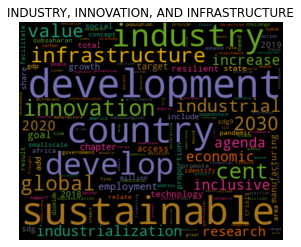

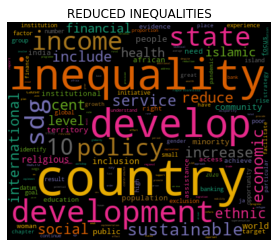

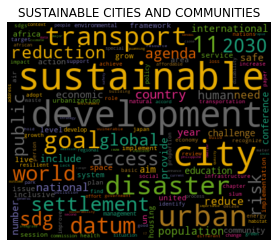

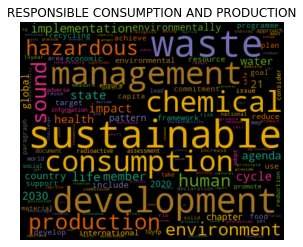

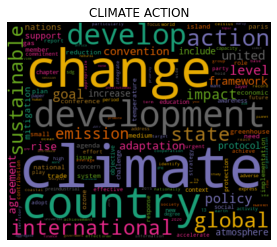

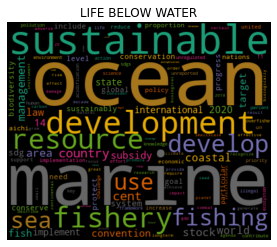

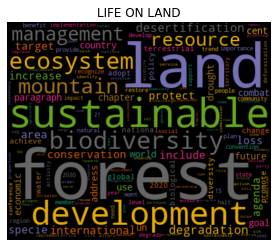

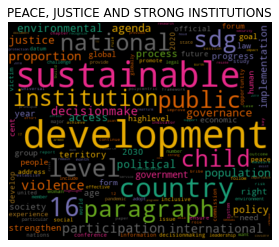

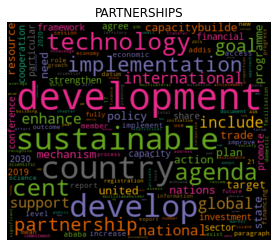

In [ ]:
# Word clouds of training data

train_df_grouped=train_df[['SDG','lemmatized']].groupby(by='SDG').agg(lambda x:' '.join(x))
generate_wordcloud_from_grouped_df(train_df_grouped)

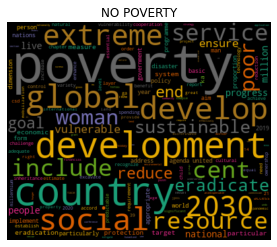

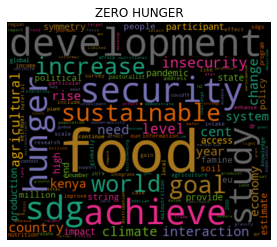

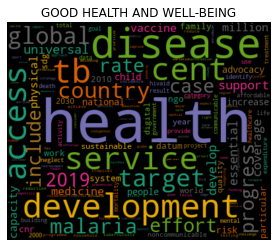

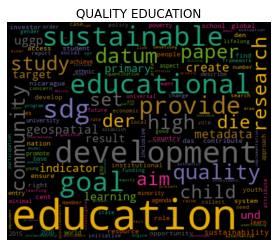

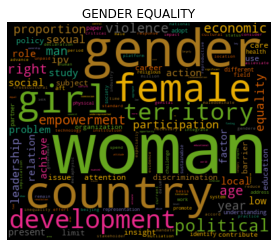

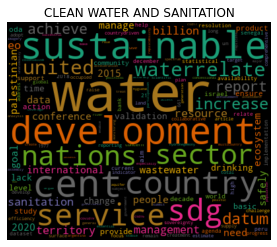

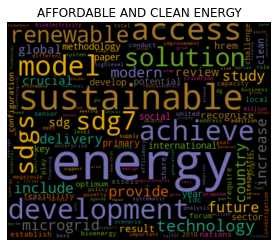

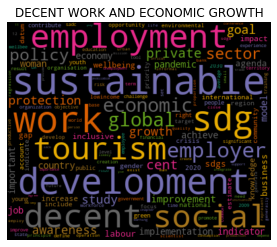

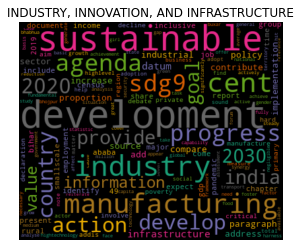

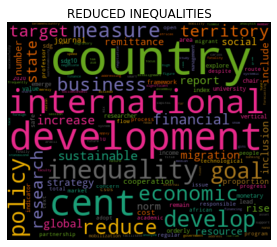

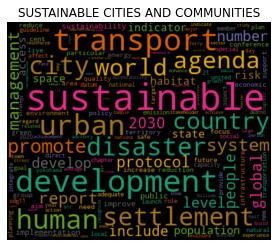

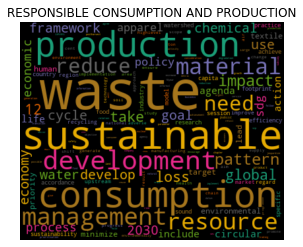

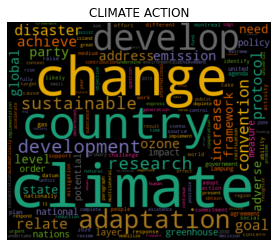

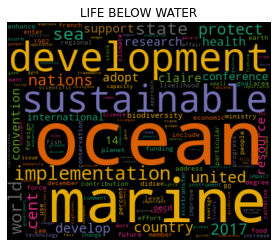

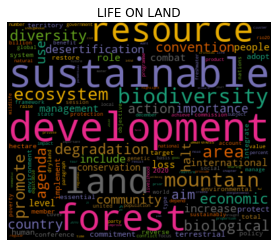

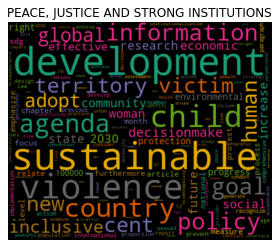

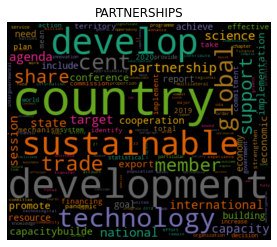

In [ ]:
# Word clouds of testing data

test_df_grouped=test_df[['SDG','lemmatized']].groupby(by='SDG').agg(lambda x:' '.join(x))
generate_wordcloud_from_grouped_df(test_df_grouped)

Suggestions:

In [ ]:
The words "sustainable, development, goals" should be removed
climate change is a single word